<a href="https://colab.research.google.com/github/twyeh/highenergy/blob/main/Flavio_examples_plots_of_q2_dependent_observables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install flavio

# Flavio examples: plots of $q^2$-dependent observables

When dealing with $q^2$-dependent observables, like differential branching ratios or angular observables, flavio can produce three different kinds of plots:

- the differential, i.e. smooth, theory prediction (via `flavio.plots.q2_plot_th_ff`)
- binned experimental measurements (via `flavio.plots.q2_plot_exp`)
- the binned theory prediction (via `flavio.plots.q2_plot_th_bin`)

This notebook illustrates the usage of these functions. For details, see the [API docs](https://flav-io.github.io/apidoc/flavio/plots/plotfunctions.m.html).

For illustration, we will focus on the branching ratio of the $B^0\to \rho^+l^-\bar\nu$ decay that is used to measure $V_{ub}$ at $B$ factories.

## Preliminaries

In [3]:
import flavio
import flavio.plots
flavio.__version__

'2.6.2'

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Differential theory prediction

As simple as:

In [12]:
!apt-get update
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,542 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,099 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,824 kB

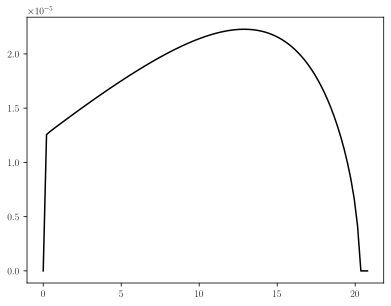

In [13]:
flavio.plots.diff_plot_th('dBR/dq2(B0->rholnu)', 0, 21,wc=None, steps=100, scale_factor=1)

Note the discontinuity at $q^2$ close to 0. This can be avoided by increasing the number of $q^2$ steps from the default (100):

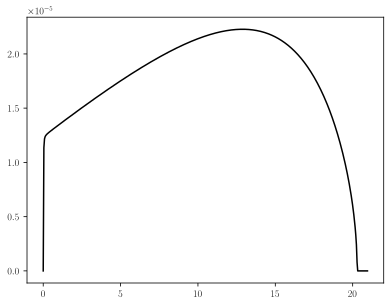

In [15]:
flavio.plots.diff_plot_th('dBR/dq2(B0->rholnu)', 0, 21,wc=None, steps=500, scale_factor=1)

The spectrum we just plotted is actually the average of the electron and muon modes. Since the two have a different low-$q^2$ end point ($m_e^2$ vs. $m_\mu^2$), the average shows a plateau close to 0:

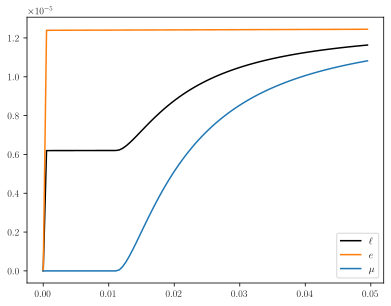

In [17]:
flavio.plots.diff_plot_th('dBR/dq2(B0->rholnu)', 0, 0.05, label=r'$\ell$')
flavio.plots.diff_plot_th('dBR/dq2(B0->rhoenu)', 0, 0.05, c='C1', label=r'$e$')
flavio.plots.diff_plot_th('dBR/dq2(B0->rhomunu)', 0, 0.05, c='C0', label=r'$\mu$')
plt.legend();

This plot also demonstrates how easy it is to add a plot legend: just use the `label` keyword argument on the plot functions and add `plt.legend()` at the end. More generally, all additional keyword arguments added to the polot functions will be passed on to the actual `matplotlib` functions (`pyplot.plot`, in this case).

### New physics

New physics can be added easily by supplying a `WilsonCoefficients` instance

In [28]:
import numpy as np
wc_np = flavio.WilsonCoefficients()
# Specify the 'WET' basis and the 'flavio' EFT explicitly
wc_np.set_initial({'CV_buenu': 0.2, 'CV_bumunu': 0.2}, scale=160, eft='WET', basis='flavio') # increasing the b->ulnu amplitude by 20%
flavio.plots.diff_plot_th('dBR/dq2(B0->rholnu)', 0, 21, label='Standard Model')
flavio.plots.diff_plot_th('dBR/dq2(B0->rholnu)', 0, 21, wc=wc_np, label='new physics', c='C1')
plt.legend();

AssertionError: Wilson coefficients do not exist in this basis: {'CV_bumunu', 'CV_buenu'}

## Experimental measurements

The measuremens defined in `measurements.yaml` can be used to automatically plot data points. The labels for the legend are set automatically.

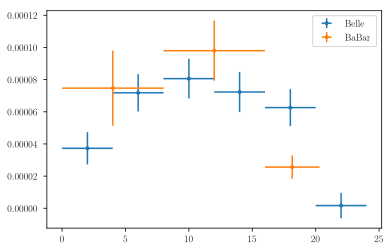

In [ ]:
flavio.plots.diff_plot_exp('<BR>(B0->rholnu)')
plt.legend()

However, this plot is actually **highly misleading**. This is because the measurements refer to *integrated branching ratios*, so we shouldn't be comparing bins with different sizes. To remedy this problem, we have to use the option `divide_binwidth`, which just divides each measurement by the bin width. As a result, we get a *binned differential branching ratio* that we can now compare to the theory prediction as well:

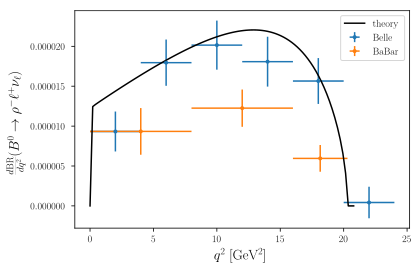

In [ ]:
flavio.plots.q2_plot_exp('<BR>(B0->rholnu)', divide_binwidth=True)
flavio.plots.q2_plot_th_diff('dBR/dq2(B0->rholnu)', 0, 21, label='theory')
plt.xlabel(r'$q^2$ [GeV$^2$]')
plt.ylabel(flavio.Observable.get_instance('dBR/dq2(B0->rholnu)').tex)
plt.legend()

The above plot also demonstrates the use of $\LaTeX$ in axis labels. For the y axis, we have even been to lazy to type the name of the observable, but simple used the `tex` attribute of the `Observable` object that is already predefined in flavio.

## Binned theory prediction

Instead of plotting the differential theory prediction, we can also directly compare the measurements to the *binned* theory prediction.

Also for `q2_plot_th_bin`, we are using the `divide_binwidth` option.

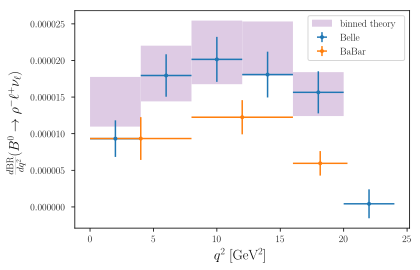

In [ ]:
bin_list = [(q2, q2+4) for q2 in range(0, 20, 4)]
flavio.plots.q2_plot_th_bin('<BR>(B0->rholnu)', bin_list=bin_list, divide_binwidth=True, label='binned theory')
flavio.plots.q2_plot_exp('<BR>(B0->rholnu)', divide_binwidth=True)
plt.xlabel(r'$q^2$ [GeV$^2$]')
plt.ylabel(flavio.Observable.get_instance('dBR/dq2(B0->rholnu)').tex)
plt.legend()